# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ADA"
cryptoPair = "USDT"

trainTestSplit = 0.8

# ------------------------------------------------------------------------------------------------------

### Loading the twitter data

In [3]:
data=pd.read_csv('Datasets/dataFileADA.csv')

In [4]:
li = data['tweet'].str.lower().str.cat(sep=' ')

# Removing punctuation,numbers and returns list of words

In [5]:
li2 = re.sub('[^A-Za-z]+', ' ', li)

# Removing the stopwords from the text

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')        
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Getting Tokenization of the text

In [7]:
word_tokens = word_tokenize(li2)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Removing characters which have length less than 2  

In [8]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers

In [9]:
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# Frequency distribution of aspect words 

In [10]:
word_dist = nltk.FreqDist(cleaned_data_title)
top100_words = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

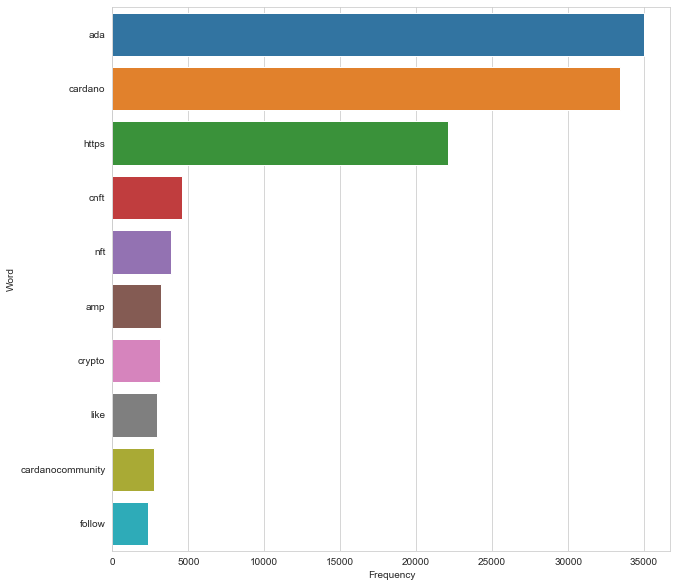

In [11]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# SentimentIntensityAnalyzer for getting sentiments

In [12]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [13]:
data["Polarity"] = data["tweet"].apply(sentiment)

In [14]:
data = data[['date','time','tweet','Polarity']]

In [15]:
data.tail()

,date,time,tweet,Polarity
28421,2021-01-01,03:58:22,I see a scenario where #Cardano $ADA makes Jan...,0.4576
28422,2021-01-01,03:32:28,What will be #Cardano $ADA's highest price in ...,0.0000
28423,2021-01-01,00:49:33,"So a friend told me about #Cardano, then I tol...",0.9515
28424,2021-01-01,00:45:52,Sorry about tweet that was deleted. Here its b...,0.5267
28425,2021-01-01,00:06:07,Wow. Just wow. #Bitcoin #Etheruem #XRP #Bitcoi...,0.8225


# Getting sentiments based on the popularity score

In [16]:
def sentiments(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [17]:
data['Sentiments'] = data.apply(sentiments, axis=1)

# sentiments with their counts

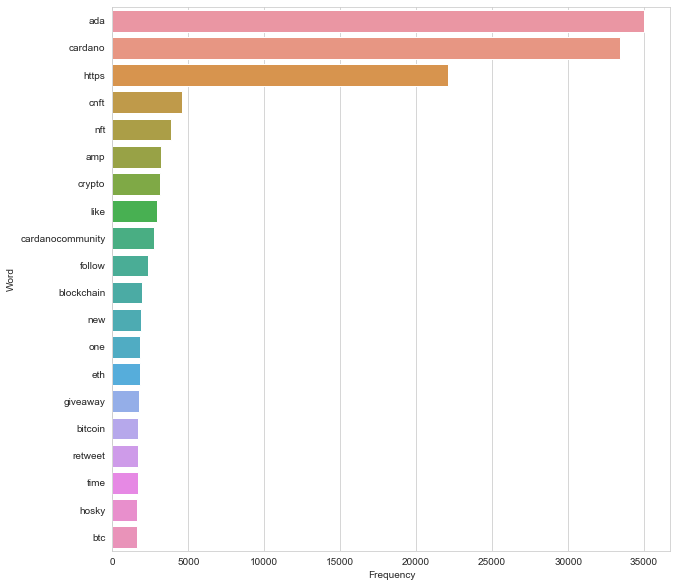

In [18]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(20))

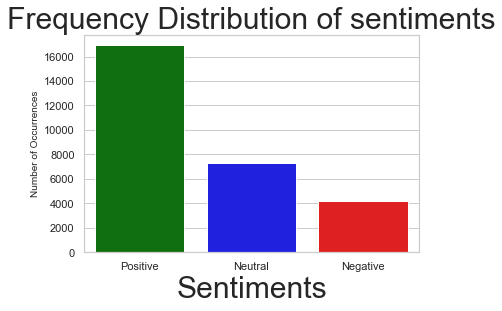

In [19]:
carrier_count = data["Sentiments"].value_counts()
sns.set(style="whitegrid")
sns.barplot(carrier_count.index, carrier_count.values, palette=dict(Neutral="blue", Positive="Green", Negative="Red"))
plt.title('Frequency Distribution of sentiments', fontsize=30)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Sentiments', fontsize=30)
plt.show()

### Loading dataset price data

In [20]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
priceData = pd.DataFrame(klines)
priceData.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
priceData.index = [dt.datetime.fromtimestamp(x/1000.0) for x in priceData.close_time]
#priceData=priceData[['open', 'high', 'low', 'close']]
priceData=priceData[['close']]
priceData.head()
priceData = priceData.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [21]:
priceData.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,0.18292000
2021-01-01 07:59:59.999,0.17955000
2021-01-01 11:59:59.999,0.17950000
2021-01-01 15:59:59.999,0.18055000
2021-01-01 19:59:59.999,0.17432000


### Five last records of data

In [22]:
priceData.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,1.32900000
2021-12-31 11:59:59.999,1.36100000
2021-12-31 15:59:59.999,1.35500000
2021-12-31 19:59:59.999,1.28600000
2021-12-31 23:59:59.999,1.30800000


### Coloumns/features in data

In [23]:
priceData.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [24]:
print('lenght of data is', len(priceData)) #lenght of data

lenght of data is 2190


In [25]:
data['Sentiments'].value_counts()

Positive    16927
Neutral      7269
Negative     4230
Name: Sentiments, dtype: int64

### Shape of data

In [26]:
data.shape #shape of data

(28426, 5)

### Data information

In [27]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28426 entries, 0 to 28425
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        28426 non-null  object 
 1   time        28426 non-null  object 
 2   tweet       28426 non-null  object 
 3   Polarity    28426 non-null  float64
 4   Sentiments  28426 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [28]:
a=data['Sentiments'].head(10)
aa=data['Sentiments'].value_counts()[0]
aa

16927

In [29]:
data.head(10-8)

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:46:35,The Diamond Mine is open! We are giving away t...,0.9449,Positive
1,2021-12-30,23:43:35,A project I have been following but haven't ha...,-0.2755,Negative


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28426 entries, 0 to 28425
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        28426 non-null  object 
 1   time        28426 non-null  object 
 2   tweet       28426 non-null  object 
 3   Polarity    28426 non-null  float64
 4   Sentiments  28426 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [31]:
#data=data.head(1000)

In [32]:
data['Sentiments'].value_counts()

Positive    16927
Neutral      7269
Negative     4230
Name: Sentiments, dtype: int64

### Data types of all coloumns

In [33]:
data.dtypes #data types of data

date           object
time           object
tweet          object
Polarity      float64
Sentiments     object
dtype: object

### Checking missing Values

In [34]:
data[data.isnull().any(axis=1)].head() #checking the null values 

,date,time,tweet,Polarity,Sentiments


### Count of missing values

In [35]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [36]:
data.isnull().values.any() #checking the null values 

False

In [37]:
data.iloc[9:25]

,date,time,tweet,Polarity,Sentiments
9,2021-12-30,22:28:07,#Cosmos and #Cardano Ecosystems Will Be Huge N...,0.3182,Positive
10,2021-12-30,22:22:34,If you delegate to CHEF pool and haven't claim...,0.4909,Positive
11,2021-12-30,22:11:58,New Year's #Giveaway !!!! 2022 will be awesom...,0.9557,Positive
12,2021-12-30,21:32:41,今日が最後の投票。途中で我慢ならんようなことがあったかもしれんけんど、腐らず、諦めず、最後ま...,0.3818,Positive
13,2021-12-30,21:23:31,"In the herd, your voice is heard! 🦬 We are al...",-0.5538,Negative
14,2021-12-30,21:13:42,Climate Neutral Cardano is a community group o...,0.0000,Neutral
15,2021-12-30,21:11:12,Time to dig out this ol gem ;) lmfaooo #derps ...,0.2263,Positive
16,2021-12-30,21:02:29,"We are giving @ContactDrip 1,000,000,000,000 $...",0.4019,Positive
17,2021-12-30,20:57:47,We’re here to change lives/the world by subver...,0.1531,Positive
18,2021-12-30,20:34:03,Ending 2021 on a positive note: PANL has just ...,0.5574,Positive


In [38]:
data.iloc[:25]

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:46:35,The Diamond Mine is open! We are giving away t...,0.9449,Positive
1,2021-12-30,23:43:35,A project I have been following but haven't ha...,-0.2755,Negative
2,2021-12-30,23:34:10,Why will 2022🌠 Be The Best Year For #Cardano ...,0.6369,Positive
3,2021-12-30,23:13:52,"BIG New Year’s Giveaway!!! 1st 1,000,000,...",0.7412,Positive
4,2021-12-30,23:12:12,Bought this NFT on the Cardano Blockchain! 🧞‍♂...,0.6696,Positive
5,2021-12-30,23:09:26,#CardanoCommunity Stake with BICEP 💪 for BISON...,0.3612,Positive
6,2021-12-30,22:49:10,Top APR% on the OpenSwap farm today: ➢95% $Ope...,0.6597,Positive
7,2021-12-30,22:40:49,Good Evening #CardanoCommunity ✨ We just teame...,0.6967,Positive
8,2021-12-30,22:37:04,Probably nothing...@BenjaminsGroup Cannot wai...,0.7964,Positive
9,2021-12-30,22:28:07,#Cosmos and #Cardano Ecosystems Will Be Huge N...,0.3182,Positive


### Counts of missing values in each column

In [39]:
data.isnull().sum() #checking the null values columns wise 

date          0
time          0
tweet         0
Polarity      0
Sentiments    0
dtype: int64

In [40]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
priceData['close']=priceData['close'].astype(float)

### Spliting date into day, month and year

In [41]:
priceData['date'] = priceData.index # taking dates in date column 
priceData.sort_index(ascending=True, inplace=True)
priceData['Month'] = priceData['date'].dt.month # extracting months from data
priceData['Day'] = priceData['date'].dt.day # extracting day from data
priceData['Year'] = priceData['date'].dt.year # extracting year from data
priceData['Hour'] = priceData['date'].dt.hour # extracting year from data
priceData['Minutes'] = priceData['date'].dt.minute # extracting year from data

### Close price with respect to year 

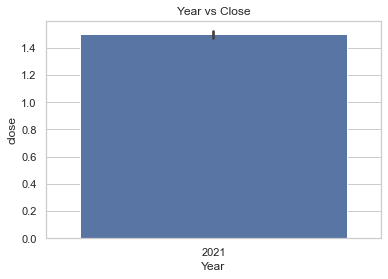

In [42]:
sns.barplot(x='Year', y='close', data=priceData).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

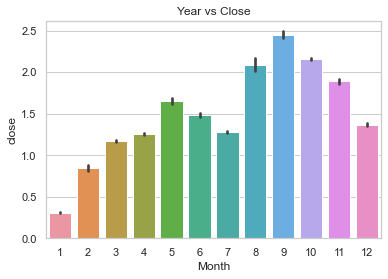

In [43]:
sns.barplot(x='Month', y='close', data=priceData).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Merging entiment with price data

# ------------------------------------------------------------------------------------------------------

In [44]:
data.head()

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:46:35,The Diamond Mine is open! We are giving away t...,0.9449,Positive
1,2021-12-30,23:43:35,A project I have been following but haven't ha...,-0.2755,Negative
2,2021-12-30,23:34:10,Why will 2022🌠 Be The Best Year For #Cardano ...,0.6369,Positive
3,2021-12-30,23:13:52,"BIG New Year’s Giveaway!!! 1st 1,000,000,...",0.7412,Positive
4,2021-12-30,23:12:12,Bought this NFT on the Cardano Blockchain! 🧞‍♂...,0.6696,Positive


In [45]:
priceData.head(10)

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,0.18292,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,0.17955,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,0.17950,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,0.18055,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,0.17432,2021-01-01 19:59:59.999,1,1,2021,19,59
2021-01-01 23:59:59.999,0.17509,2021-01-01 23:59:59.999,1,1,2021,23,59
2021-01-02 03:59:59.999,0.17501,2021-01-02 03:59:59.999,1,2,2021,3,59
2021-01-02 07:59:59.999,0.17242,2021-01-02 07:59:59.999,1,2,2021,7,59
2021-01-02 11:59:59.999,0.17204,2021-01-02 11:59:59.999,1,2,2021,11,59
2021-01-02 15:59:59.999,0.17886,2021-01-02 15:59:59.999,1,2,2021,15,59


In [46]:
priceData['sentimentCount'] = 0

In [47]:
for i, row in enumerate(data.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] -= 1
    else:
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] -= 1

In [48]:
priceData.loc[priceData['sentimentCount'] == 0]

,close,date,Month,Day,Year,Hour,Minutes,sentimentCount
2021-01-01 07:59:59.999,0.17955,2021-01-01 07:59:59.999,1,1,2021,7,59,0
2021-01-03 07:59:59.999,0.17436,2021-01-03 07:59:59.999,1,3,2021,7,59,0
2021-01-04 07:59:59.999,0.21657,2021-01-04 07:59:59.999,1,4,2021,7,59,0
2021-01-04 23:59:59.999,0.22528,2021-01-04 23:59:59.999,1,4,2021,23,59,0
2021-01-07 07:59:59.999,0.32848,2021-01-07 07:59:59.999,1,7,2021,7,59,0
...,...,...,...,...,...,...,...,...
2021-12-31 07:59:59.999,1.32900,2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,1.36100,2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,1.35500,2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,1.28600,2021-12-31 19:59:59.999,12,31,2021,19,59,0


In [49]:
priceData.iloc[2150:]

,close,date,Month,Day,Year,Hour,Minutes,sentimentCount
2021-12-25 11:59:59.999,1.429,2021-12-25 11:59:59.999,12,25,2021,11,59,0
2021-12-25 15:59:59.999,1.446,2021-12-25 15:59:59.999,12,25,2021,15,59,10
2021-12-25 19:59:59.999,1.438,2021-12-25 19:59:59.999,12,25,2021,19,59,10
2021-12-25 23:59:59.999,1.452,2021-12-25 23:59:59.999,12,25,2021,23,59,9
2021-12-26 03:59:59.999,1.411,2021-12-26 03:59:59.999,12,26,2021,3,59,2
2021-12-26 07:59:59.999,1.425,2021-12-26 07:59:59.999,12,26,2021,7,59,2
2021-12-26 11:59:59.999,1.435,2021-12-26 11:59:59.999,12,26,2021,11,59,3
2021-12-26 15:59:59.999,1.440,2021-12-26 15:59:59.999,12,26,2021,15,59,12
2021-12-26 19:59:59.999,1.461,2021-12-26 19:59:59.999,12,26,2021,19,59,13
2021-12-26 23:59:59.999,1.455,2021-12-26 23:59:59.999,12,26,2021,23,59,9


# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

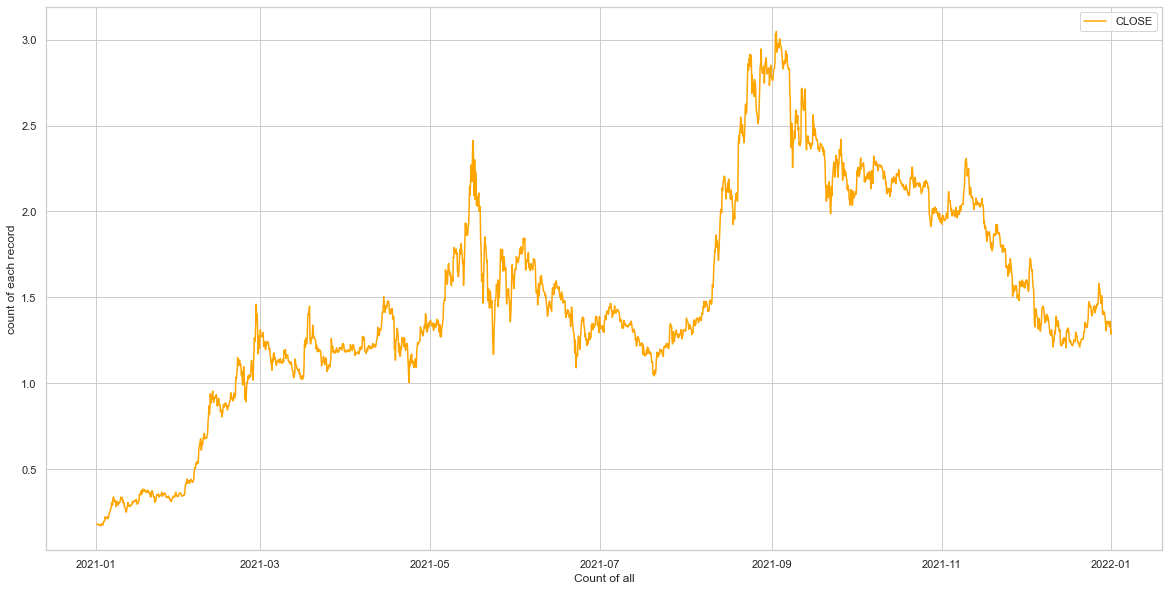

In [50]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(priceData.index, priceData['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [51]:
X=priceData.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

,Month,Day,Year,Hour,Minutes,sentimentCount
2021-01-01 03:59:59.999,1,1,2021,3,59,4
2021-01-01 07:59:59.999,1,1,2021,7,59,0
2021-01-01 11:59:59.999,1,1,2021,11,59,4
2021-01-01 15:59:59.999,1,1,2021,15,59,6
2021-01-01 19:59:59.999,1,1,2021,19,59,4
...,...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,12,31,2021,19,59,0


### Taking target as output

In [52]:
y=priceData['close'] # output close 
y #output 

2021-01-01 03:59:59.999    0.18292
2021-01-01 07:59:59.999    0.17955
2021-01-01 11:59:59.999    0.17950
2021-01-01 15:59:59.999    0.18055
2021-01-01 19:59:59.999    0.17432
                            ...   
2021-12-31 07:59:59.999    1.32900
2021-12-31 11:59:59.999    1.36100
2021-12-31 15:59:59.999    1.35500
2021-12-31 19:59:59.999    1.28600
2021-12-31 23:59:59.999    1.30800
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [53]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# SARIMAX

In [54]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.568
ARIMA(0, 0, 1) RMSE=0.564
ARIMA(0, 0, 2) RMSE=0.560
ARIMA(0, 1, 0) RMSE=0.808
ARIMA(0, 1, 1) RMSE=0.801
ARIMA(0, 1, 2) RMSE=0.806
ARIMA(0, 2, 0) RMSE=3.269
ARIMA(0, 2, 1) RMSE=0.477
ARIMA(0, 2, 2) RMSE=0.387
ARIMA(1, 0, 0) RMSE=0.447
ARIMA(1, 0, 1) RMSE=0.341
ARIMA(1, 0, 2) RMSE=0.617
ARIMA(1, 1, 0) RMSE=0.807
ARIMA(1, 1, 1) RMSE=0.802
ARIMA(1, 1, 2) RMSE=0.752
ARIMA(1, 2, 0) RMSE=1.650
ARIMA(1, 2, 1) RMSE=0.433
ARIMA(1, 2, 2) RMSE=0.505
ARIMA(2, 0, 0) RMSE=0.265
ARIMA(2, 0, 1) RMSE=0.705
ARIMA(2, 0, 2) RMSE=0.549
ARIMA(2, 1, 0) RMSE=0.804
ARIMA(2, 1, 1) RMSE=0.805
ARIMA(2, 1, 2) RMSE=0.788
ARIMA(2, 2, 0) RMSE=0.610
ARIMA(2, 2, 1) RMSE=0.144
ARIMA(2, 2, 2) RMSE=0.499
ARIMA(4, 0, 0) RMSE=0.216
ARIMA(4, 0, 1) RMSE=0.532
ARIMA(4, 0, 2) RMSE=0.690
ARIMA(4, 1, 0) RMSE=0.775
ARIMA(4, 1, 1) RMSE=0.778
ARIMA(4, 1, 2) RMSE=0.799
ARIMA(4, 2, 0) RMSE=1.624
ARIMA(4, 2, 1) RMSE=0.299
ARIMA(4, 2, 2) RMSE=0.149
ARIMA(6, 0, 0) RMSE=0.586
ARIMA(6, 0, 1) RMSE=0.473
ARIMA(6, 0, 

In [55]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [56]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [57]:
test_mse1=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  0.02066


# MAE

In [58]:
test_MAE1=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  0.12044


# RMSE

In [59]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  0.14372


# MAPE

In [60]:
test_mape1=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.07611


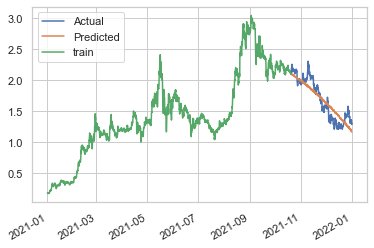

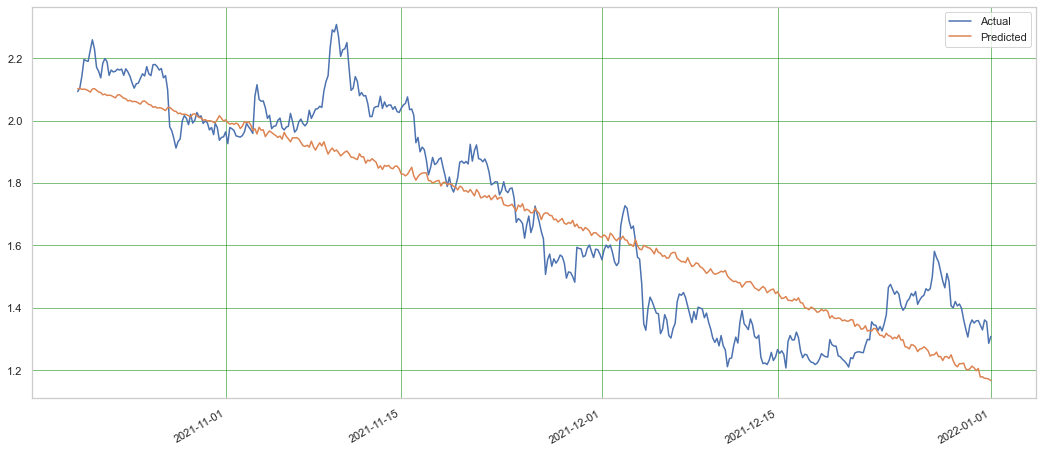

In [61]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# ARIMAX

In [62]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1.184
ARIMA(0, 0, 1) RMSE=1.699
ARIMA(0, 0, 2) RMSE=1.716
ARIMA(0, 1, 0) RMSE=0.536
ARIMA(0, 1, 1) RMSE=0.536
ARIMA(0, 1, 2) RMSE=0.536
ARIMA(0, 2, 0) RMSE=3.052
ARIMA(0, 2, 1) RMSE=0.809
ARIMA(0, 2, 2) RMSE=0.808
ARIMA(1, 0, 0) RMSE=0.349
ARIMA(1, 0, 1) RMSE=0.367
ARIMA(1, 0, 2) RMSE=0.367
ARIMA(1, 1, 0) RMSE=0.536
ARIMA(1, 1, 1) RMSE=0.536
ARIMA(1, 1, 2) RMSE=0.536
ARIMA(1, 2, 0) RMSE=1.215
ARIMA(1, 2, 1) RMSE=0.808
ARIMA(1, 2, 2) RMSE=0.808
ARIMA(2, 0, 0) RMSE=0.366
ARIMA(2, 0, 1) RMSE=0.456
ARIMA(2, 0, 2) RMSE=0.506
ARIMA(2, 1, 0) RMSE=0.536
ARIMA(2, 1, 1) RMSE=0.536
ARIMA(2, 1, 2) RMSE=0.536
ARIMA(2, 2, 0) RMSE=0.168
ARIMA(2, 2, 1) RMSE=0.802
ARIMA(2, 2, 2) RMSE=0.808
ARIMA(4, 0, 0) RMSE=0.274
ARIMA(4, 0, 1) RMSE=0.369
ARIMA(4, 0, 2) RMSE=0.330
ARIMA(4, 1, 0) RMSE=0.536
ARIMA(4, 1, 1) RMSE=0.538
ARIMA(4, 1, 2) RMSE=0.537
ARIMA(4, 2, 0) RMSE=0.828
ARIMA(4, 2, 1) RMSE=0.737
ARIMA(4, 2, 2) RMSE=0.227
ARIMA(6, 0, 0) RMSE=0.593
ARIMA(6, 0, 1) RMSE=0.163
ARIMA(6, 0, 

In [63]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=(best_cfg))
results=model.fit()

In [64]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [65]:
test_mse2=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  0.0215


# MAE

In [66]:
test_MAE2=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  0.12098


# RMSE

In [67]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  0.14662


# MAPE

In [68]:
test_mape2=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.07361


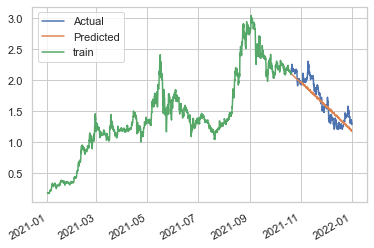

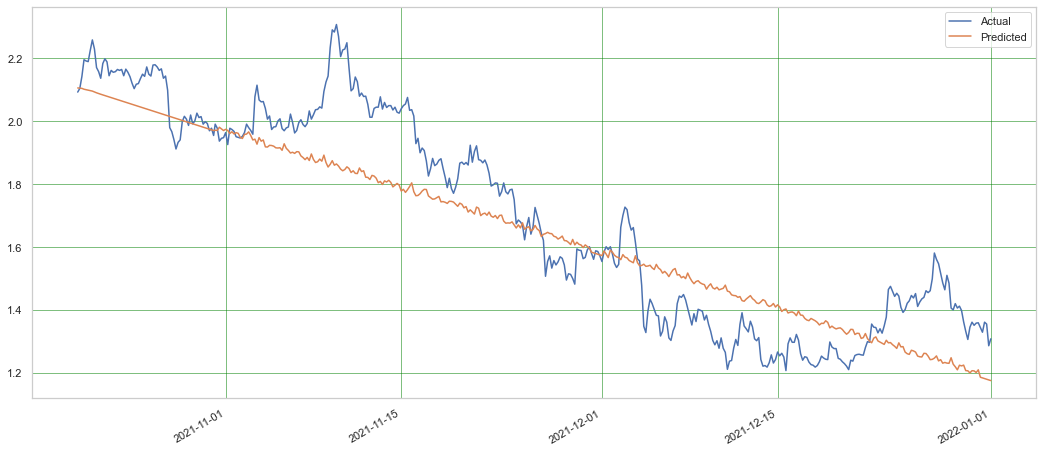

In [69]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [70]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [71]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 11417.95355134
Iteration 2, loss = 2557.28860374
Iteration 3, loss = 2185.76260333
Iteration 4, loss = 1877.64630283
Iteration 5, loss = 645.96437106
Iteration 6, loss = 269.78710717
Iteration 7, loss = 342.33807586
Iteration 8, loss = 227.64639941
Iteration 9, loss = 87.67249849
Iteration 10, loss = 38.81245394
Iteration 11, loss = 31.72215520
Iteration 12, loss = 20.53116407
Iteration 13, loss = 11.59214798
Iteration 14, loss = 4.47897685
Iteration 15, loss = 1.47691589
Iteration 16, loss = 0.73851354
Iteration 17, loss = 0.55124005
Iteration 18, loss = 0.46372646
Iteration 19, loss = 0.33451195
Iteration 20, loss = 0.32031906
Iteration 21, loss = 0.30006405
Iteration 22, loss = 0.30399732
Iteration 23, loss = 0.28011594
Iteration 24, loss = 0.28845419
Iteration 25, loss = 0.26846052
Iteration 26, loss = 0.24099260
Iteration 27, loss = 0.23383371
Iteration 28, loss = 0.22927186
Iteration 29, loss = 0.21715687
Iteration 30, loss = 0.20396390
Iteration 31, loss = 0.

Iteration 43, loss = 0.30446487
Iteration 44, loss = 0.35001500
Iteration 45, loss = 0.29465205
Iteration 46, loss = 0.26753447
Iteration 47, loss = 0.25747445
Iteration 48, loss = 0.24965146
Iteration 49, loss = 0.24617042
Iteration 50, loss = 0.24856744
Iteration 51, loss = 0.23280830
Iteration 52, loss = 0.25087452
Iteration 53, loss = 0.25660459
Iteration 54, loss = 0.22701781
Iteration 55, loss = 0.27774766
Iteration 56, loss = 0.25490442
Iteration 57, loss = 0.23801281
Iteration 58, loss = 0.23864502
Iteration 59, loss = 0.20563809
Iteration 60, loss = 0.19816233
Iteration 61, loss = 0.20460176
Iteration 62, loss = 0.20298007
Iteration 63, loss = 0.19499793
Iteration 64, loss = 0.20677628
Iteration 65, loss = 0.18079471
Iteration 66, loss = 0.17933078
Iteration 67, loss = 0.18544460
Iteration 68, loss = 0.17794548
Iteration 69, loss = 0.16825427
Iteration 70, loss = 0.16193218
Iteration 71, loss = 0.16240401
Iteration 72, loss = 0.15969414
Iteration 73, loss = 0.16341079
Iteratio

Iteration 47, loss = 0.09709479
Iteration 48, loss = 0.09082007
Iteration 49, loss = 0.09114321
Iteration 50, loss = 0.09137630
Iteration 51, loss = 0.10571676
Iteration 52, loss = 0.11571051
Iteration 53, loss = 0.10694025
Iteration 54, loss = 0.10698884
Iteration 55, loss = 0.09829708
Iteration 56, loss = 0.09490834
Iteration 57, loss = 0.09218398
Iteration 58, loss = 0.09968550
Iteration 59, loss = 0.09778420
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2570.52389318
Iteration 2, loss = 1214.21804834
Iteration 3, loss = 587.39548964
Iteration 4, loss = 348.88317807
Iteration 5, loss = 229.56542729
Iteration 6, loss = 152.83331949
Iteration 7, loss = 96.27760950
Iteration 8, loss = 60.96725493
Iteration 9, loss = 36.83282395
Iteration 10, loss = 21.50113983
Iteration 11, loss = 11.10760639
Iteration 12, loss = 5.12015745
Iteration 13, loss = 1.46793898
Iteration 14, loss = 0.83705484
Iteration 15, loss = 0.75317084
Iter

Iteration 28, loss = 1.12850869
Iteration 29, loss = 1.12230519
Iteration 30, loss = 1.10773309
Iteration 31, loss = 1.09369517
Iteration 32, loss = 1.08324725
Iteration 33, loss = 1.07552977
Iteration 34, loss = 1.06306947
Iteration 35, loss = 1.05521896
Iteration 36, loss = 1.04782233
Iteration 37, loss = 1.03532119
Iteration 38, loss = 1.02707678
Iteration 39, loss = 1.02152161
Iteration 40, loss = 1.00730010
Iteration 41, loss = 0.99438989
Iteration 42, loss = 0.96081409
Iteration 43, loss = 0.93276588
Iteration 44, loss = 0.90697233
Iteration 45, loss = 0.88670801
Iteration 46, loss = 0.84752287
Iteration 47, loss = 0.82479161
Iteration 48, loss = 0.77600138
Iteration 49, loss = 0.72799219
Iteration 50, loss = 0.69248200
Iteration 51, loss = 0.65003558
Iteration 52, loss = 0.62474031
Iteration 53, loss = 0.57186809
Iteration 54, loss = 0.55073054
Iteration 55, loss = 0.48712711
Iteration 56, loss = 0.45228084
Iteration 57, loss = 0.43335334
Iteration 58, loss = 0.38675449
Iteratio

Iteration 126, loss = 0.13881772
Iteration 127, loss = 0.11868327
Iteration 128, loss = 0.11692713
Iteration 129, loss = 0.11832812
Iteration 130, loss = 0.12227064
Iteration 131, loss = 0.12788324
Iteration 132, loss = 0.11804467
Iteration 133, loss = 0.13053612
Iteration 134, loss = 0.12326281
Iteration 135, loss = 0.11822138
Iteration 136, loss = 0.11438002
Iteration 137, loss = 0.11364746
Iteration 138, loss = 0.11048871
Iteration 139, loss = 0.11645595
Iteration 140, loss = 0.10645782
Iteration 141, loss = 0.10449517
Iteration 142, loss = 0.10421899
Iteration 143, loss = 0.10441622
Iteration 144, loss = 0.11030325
Iteration 145, loss = 0.12060681
Iteration 146, loss = 0.10544067
Iteration 147, loss = 0.11105110
Iteration 148, loss = 0.11875493
Iteration 149, loss = 0.10915799
Iteration 150, loss = 0.10433814
Iteration 151, loss = 0.10198201
Iteration 152, loss = 0.11370186
Iteration 153, loss = 0.12133114
Iteration 154, loss = 0.13577708
Iteration 155, loss = 0.12892341
Iteration 

Iteration 25, loss = 0.20521420
Iteration 26, loss = 0.20452506
Iteration 27, loss = 0.19913262
Iteration 28, loss = 0.24441934
Iteration 29, loss = 0.20697833
Iteration 30, loss = 0.24185565
Iteration 31, loss = 0.22415114
Iteration 32, loss = 0.19326923
Iteration 33, loss = 0.19719371
Iteration 34, loss = 0.19955841
Iteration 35, loss = 0.19444192
Iteration 36, loss = 0.19165234
Iteration 37, loss = 0.20580726
Iteration 38, loss = 0.20120999
Iteration 39, loss = 0.18226287
Iteration 40, loss = 0.17508238
Iteration 41, loss = 0.17975620
Iteration 42, loss = 0.19134044
Iteration 43, loss = 0.20962487
Iteration 44, loss = 0.21445862
Iteration 45, loss = 0.17850382
Iteration 46, loss = 0.17151880
Iteration 47, loss = 0.17412304
Iteration 48, loss = 0.17774722
Iteration 49, loss = 0.18239777
Iteration 50, loss = 0.17146411
Iteration 51, loss = 0.18616401
Iteration 52, loss = 0.16741904
Iteration 53, loss = 0.15949242
Iteration 54, loss = 0.16740563
Iteration 55, loss = 0.16334251
Iteratio

Iteration 55, loss = 0.09483753
Iteration 56, loss = 0.07607028
Iteration 57, loss = 0.07313489
Iteration 58, loss = 0.07118988
Iteration 59, loss = 0.07283164
Iteration 60, loss = 0.06505976
Iteration 61, loss = 0.06777340
Iteration 62, loss = 0.06740969
Iteration 63, loss = 0.05869982
Iteration 64, loss = 0.06075427
Iteration 65, loss = 0.05692250
Iteration 66, loss = 0.06966721
Iteration 67, loss = 0.05820220
Iteration 68, loss = 0.05993946
Iteration 69, loss = 0.05132202
Iteration 70, loss = 0.07738869
Iteration 71, loss = 0.05568990
Iteration 72, loss = 0.05146322
Iteration 73, loss = 0.04084271
Iteration 74, loss = 0.04290340
Iteration 75, loss = 0.04415257
Iteration 76, loss = 0.04415477
Iteration 77, loss = 0.03839686
Iteration 78, loss = 0.04348011
Iteration 79, loss = 0.04247985
Iteration 80, loss = 0.04971742
Iteration 81, loss = 0.06207148
Iteration 82, loss = 0.03723993
Iteration 83, loss = 0.04663174
Iteration 84, loss = 0.03623331
Iteration 85, loss = 0.03746728
Iteratio

Iteration 32, loss = 0.09540946
Iteration 33, loss = 0.10207740
Iteration 34, loss = 0.07434332
Iteration 35, loss = 0.08064072
Iteration 36, loss = 0.08830241
Iteration 37, loss = 0.07808493
Iteration 38, loss = 0.07812048
Iteration 39, loss = 0.10675636
Iteration 40, loss = 0.09421568
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Wall time: 7.03 s


RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [72]:
Model_R.best_params_

{'momentum': 0.9,
 'max_iter': 400,
 'learning_rate_init': 0.004,
 'hidden_layer_sizes': (200,)}

# Evaluation Measures on Test data

# MSE

In [73]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  1.18096


# MAE

In [74]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  0.98516


# RMSE

In [75]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  1.08672


# MAPE

In [76]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.65653


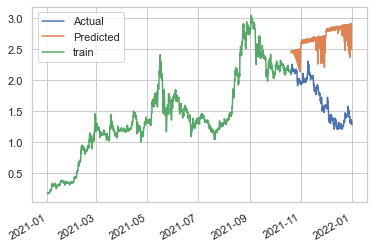

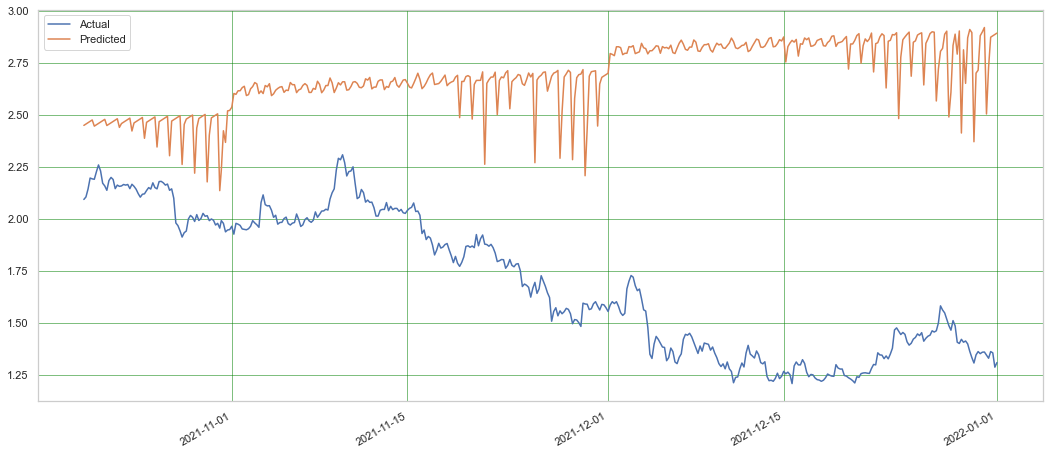

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [78]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [79]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 58.1 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [80]:
Model_R.best_params_

{'tol': 0.002, 'max_iter': 100, 'alpha': 3.0}

# Evaluation Measures on Test data

# MSE

In [81]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  1.41201


# MAE

In [82]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  1.08217


# RMSE

In [83]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  1.18828


# MAPE

In [84]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.7195


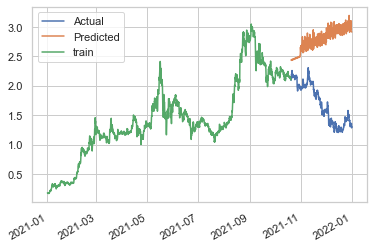

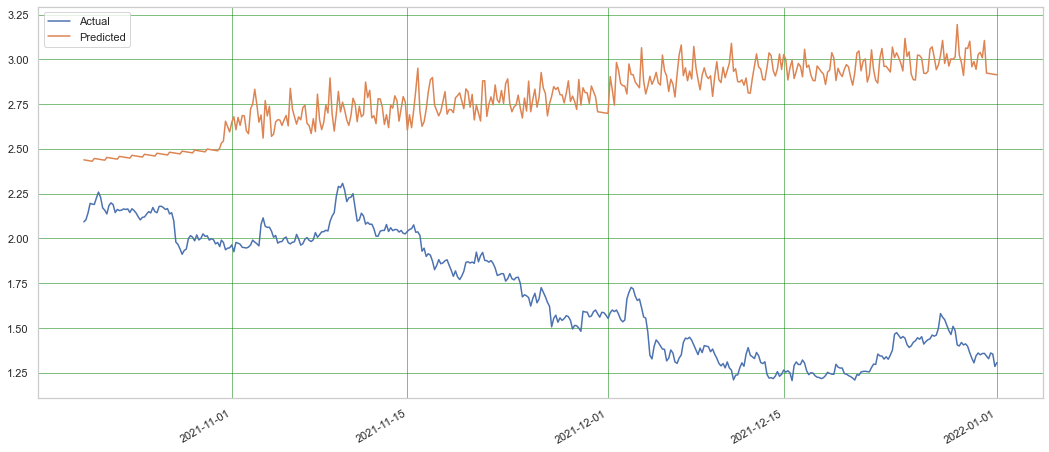

In [85]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [86]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [87]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 1.94 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [88]:
Model_R.best_params_

{'random_state': 30, 'min_samples_leaf': 50, 'max_depth': 40}

# Evaluation Measures on Test data

# MSE

In [89]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  0.46314


# MAE

In [90]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  0.59354


# RMSE

In [91]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  0.68055


# MAPE

In [92]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.40203


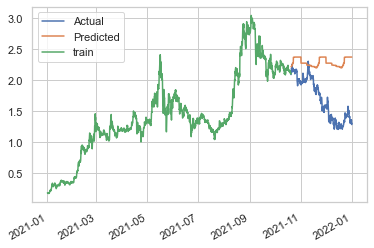

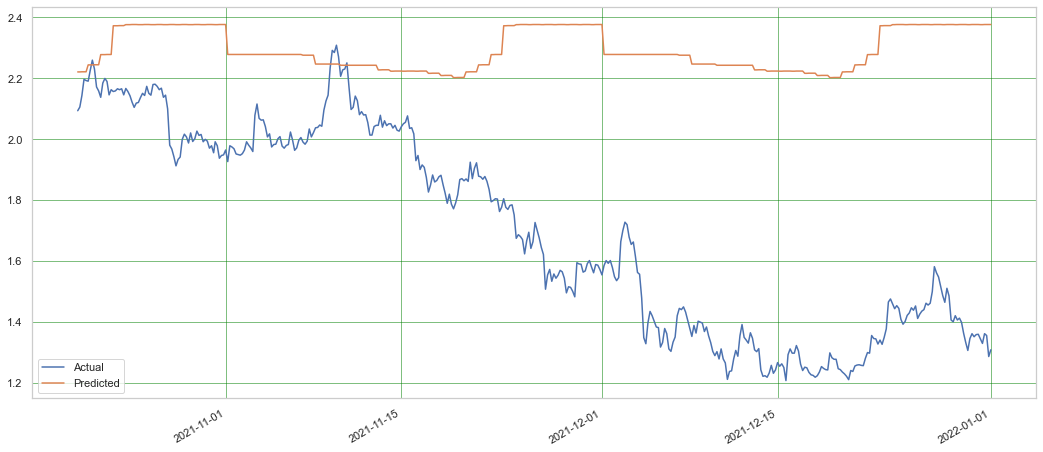

In [93]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [94]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [95]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 5.93 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [96]:
Model_R.best_params_

{'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.1, 'base_score': 0.6}

# Evaluation Measures on Test data

# MSE

In [97]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  0.34224


# MAE

In [98]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  0.48677


# RMSE

In [99]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  0.58501


# MAPE

In [100]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.33593


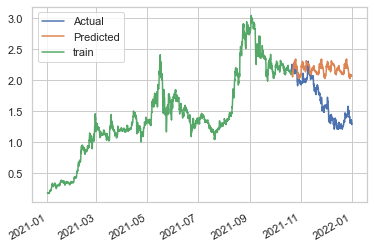

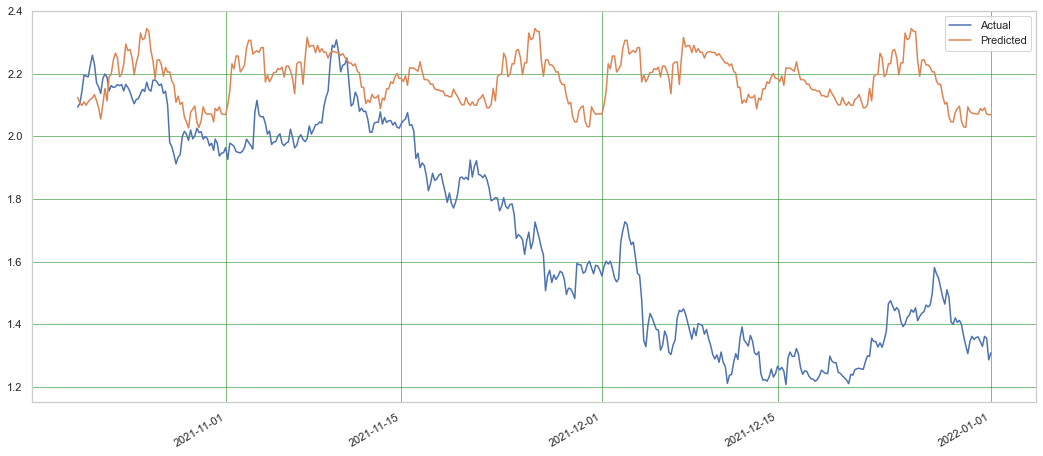

In [101]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [102]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["ARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MSE score |
+-------------------------+-----------+
|    SARIMAX Algorithm    |   0.021   |
|     ARIMAX Algorithm    |   0.021   |
|      MLP Algorithm      |   1.181   |
|     Ridge Algorithm     |   1.412   |
| Random Forest Algorithm |   0.463   |
|      XGB Algorithm      |   0.342   |
+-------------------------+-----------+




# Comparison of all algorithms Results on MAE score

In [103]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["SARIMAX Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["ARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|    SARIMAX Algorithm    |    0.12   |
|     ARIMAX Algorithm    |   0.121   |
|      MLP Algorithm      |   0.985   |
|     Ridge Algorithm     |   1.082   |
| Random Forest Algorithm |   0.594   |
|      XGB Algorithm      |   0.487   |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [104]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["ARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|    SARIMAX Algorithm    |   0.144    |
|     ARIMAX Algorithm    |   0.147    |
|      MLP Algorithm      |   1.087    |
|     Ridge Algorithm     |   1.188    |
| Random Forest Algorithm |   0.681    |
|      XGB Algorithm      |   0.585    |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [105]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["ARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|    SARIMAX Algorithm    |   0.076    |
|     ARIMAX Algorithm    |   0.074    |
|      MLP Algorithm      |   0.657    |
|     Ridge Algorithm     |   0.719    |
| Random Forest Algorithm |   0.402    |
|      XGB Algorithm      |   0.336    |
+-------------------------+------------+


